In [ ]:
from google.colab import files
adfile=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

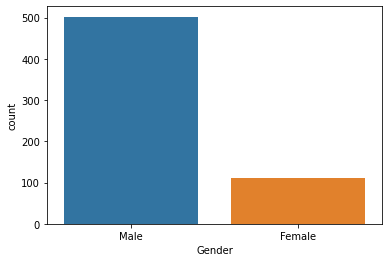

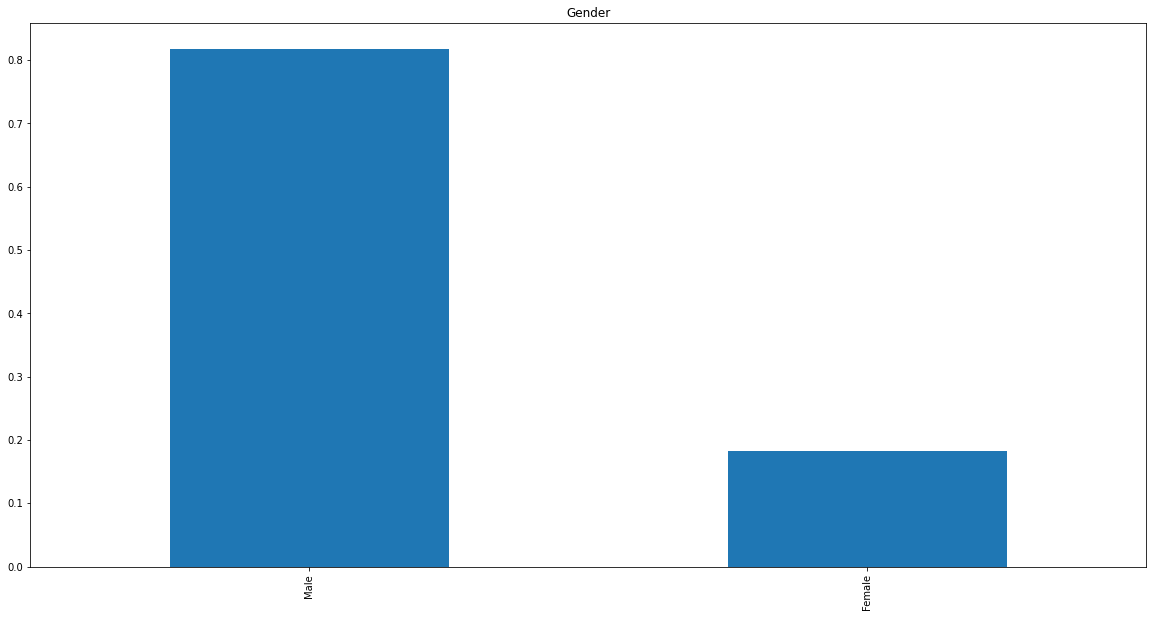

In [ ]:
sns.countplot(df['Gender'])
plt.show()
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()

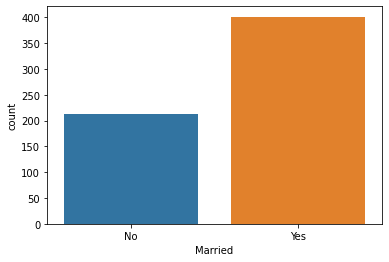

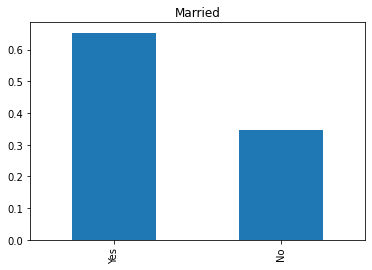

In [ ]:
sns.countplot(df['Married'])
plt.show()
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

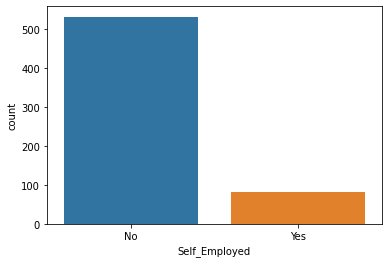

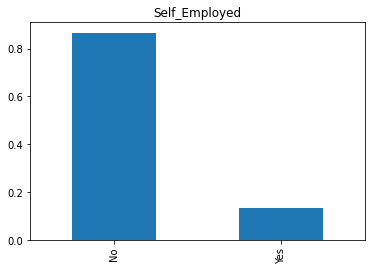

In [ ]:
sns.countplot(df['Self_Employed'])
plt.show()
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

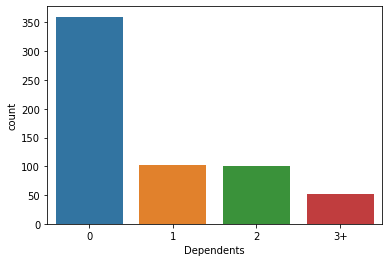

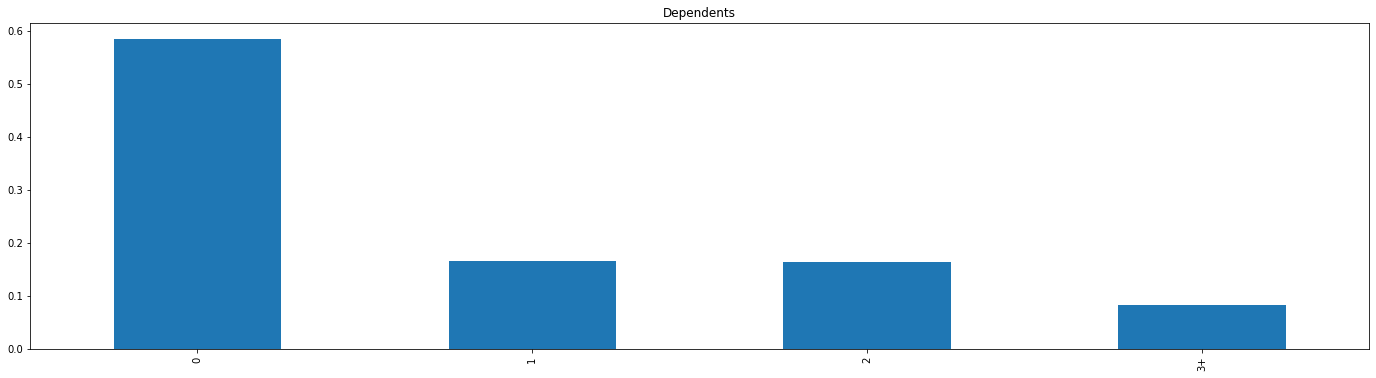

In [ ]:
sns.countplot(df['Dependents'])
plt.show()
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()

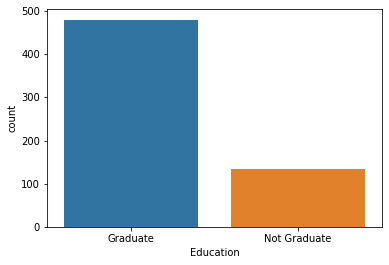

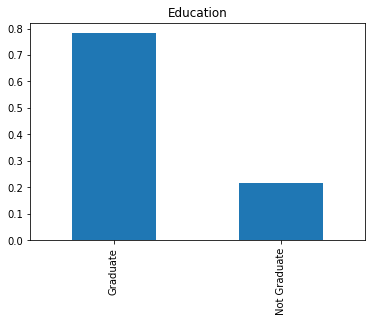

In [ ]:
sns.countplot(df['Education'])
plt.show()
df['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

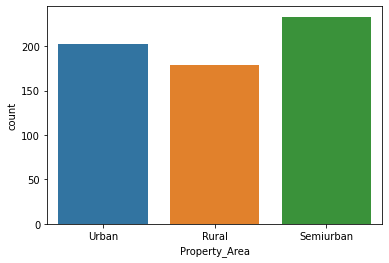

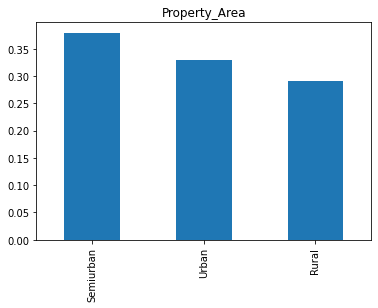

In [ ]:
sns.countplot(df['Property_Area'])
plt.show()
df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

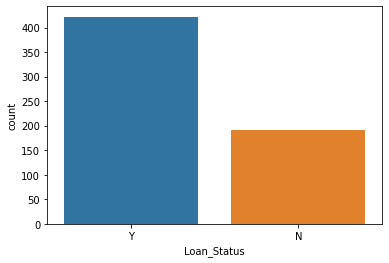

In [ ]:
sns.countplot(df['Loan_Status'])

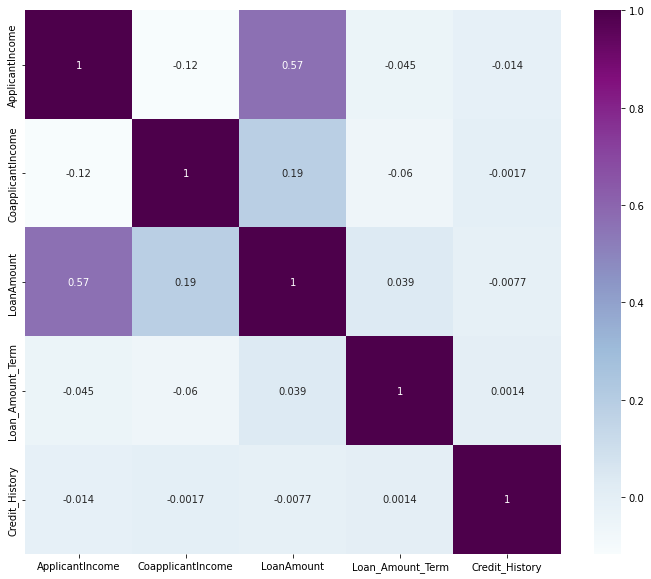

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

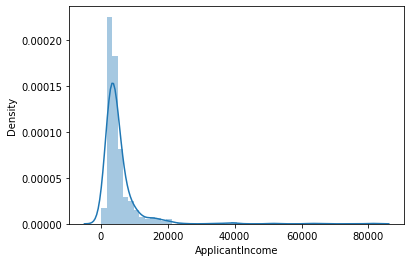

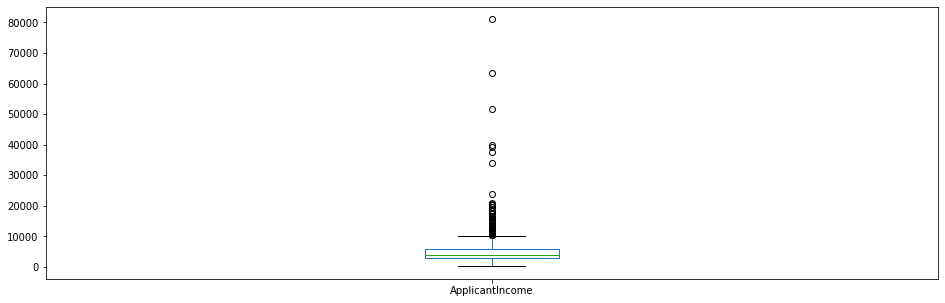

In [ ]:
sns.distplot(df['ApplicantIncome'])
plt.show()
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

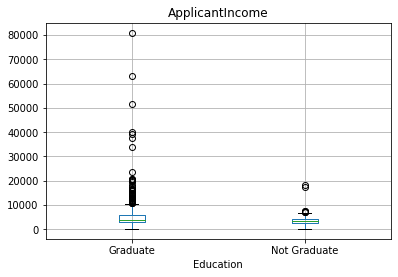

In [ ]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

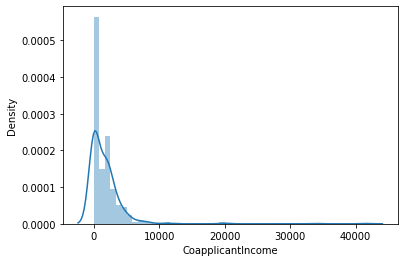

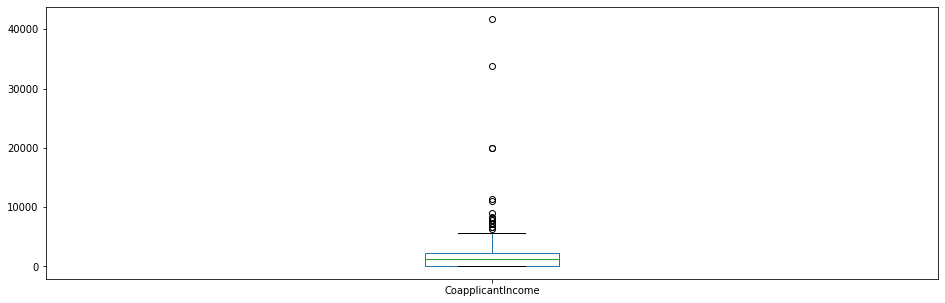

In [ ]:
sns.distplot(df['CoapplicantIncome'])
plt.show()
df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

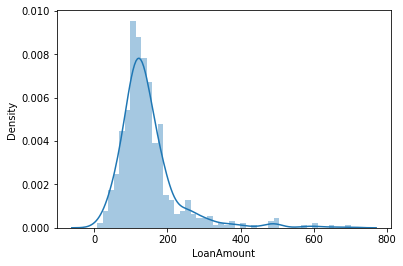

In [ ]:
sns.distplot(df["LoanAmount"])

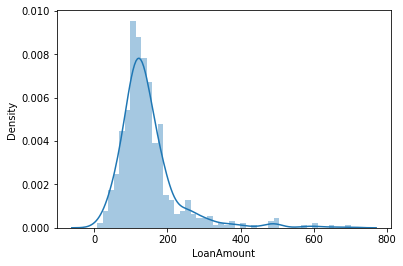

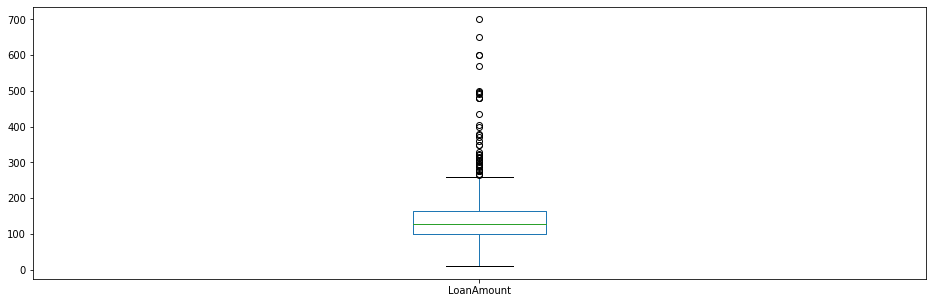

In [ ]:
df.notna()
sns.distplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

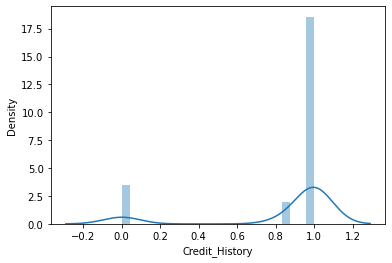

In [ ]:
sns.distplot(df['Credit_History'])

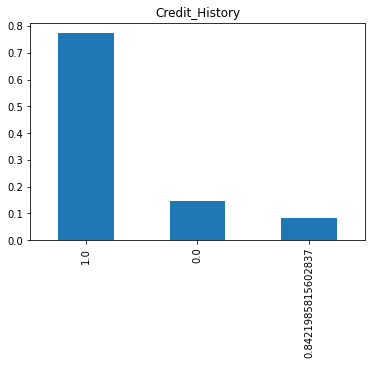

In [ ]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

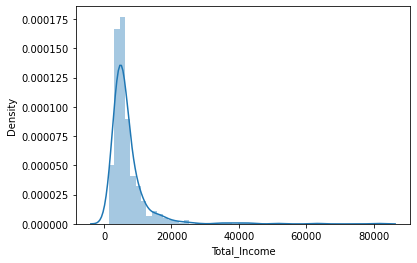

In [ ]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.distplot(df['Total_Income'])

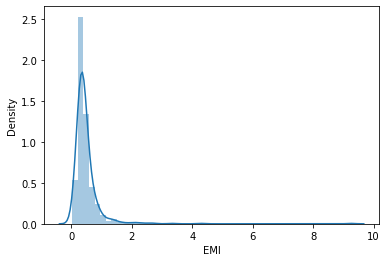

In [ ]:
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
sns.distplot(df['EMI'])

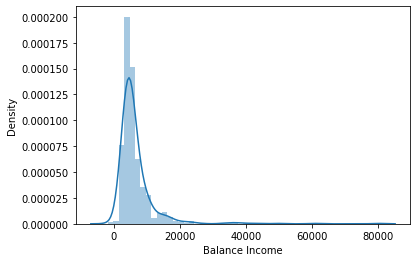

In [ ]:
df['Balance Income'] = df['Total_Income']-(df['EMI']*1000)
sns.distplot(df['Balance Income'])

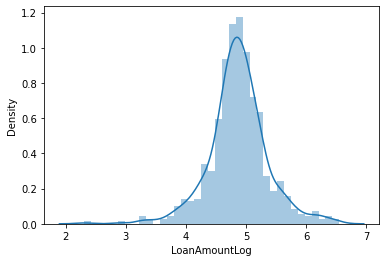

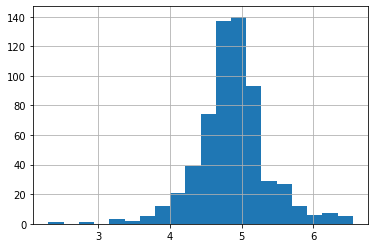

In [ ]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])
plt.show()
df['LoanAmountLog'].hist(bins=20)

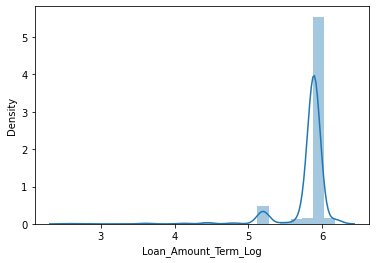

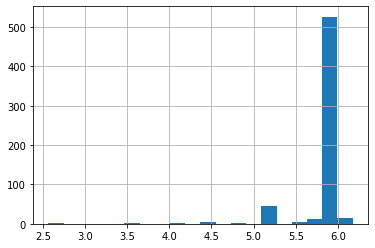

In [ ]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])
plt.show()
df['Loan_Amount_Term_Log'].hist(bins=20)

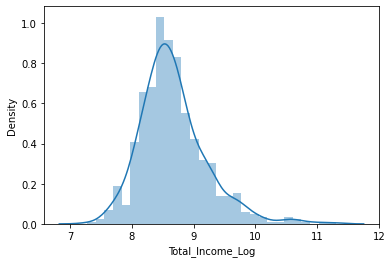

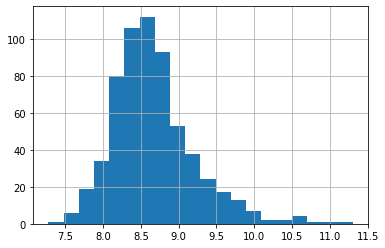

In [ ]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])
plt.show()
df['Total_Income_Log'].hist(bins=20)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Balance Income,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,0.406700,5442.299550,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,0.355556,5735.444444,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,0.183333,2816.666667,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,0.333333,4607.666667,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,0.391667,5608.333333,4.955827,5.888878,8.699681


In [ ]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID','Loan_Amount_Term','Total_Income_Log',"EMI"]
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Balance Income,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,5442.299550,4.993232,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,5735.444444,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2816.666667,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4607.666667,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,5608.333333,4.955827,5.888878


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Balance Income,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,5442.299550,4.993232,5.888878
1,1,1,1,0,0,1.0,0,0,5735.444444,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,2816.666667,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,4607.666667,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,5608.333333,4.955827,5.888878


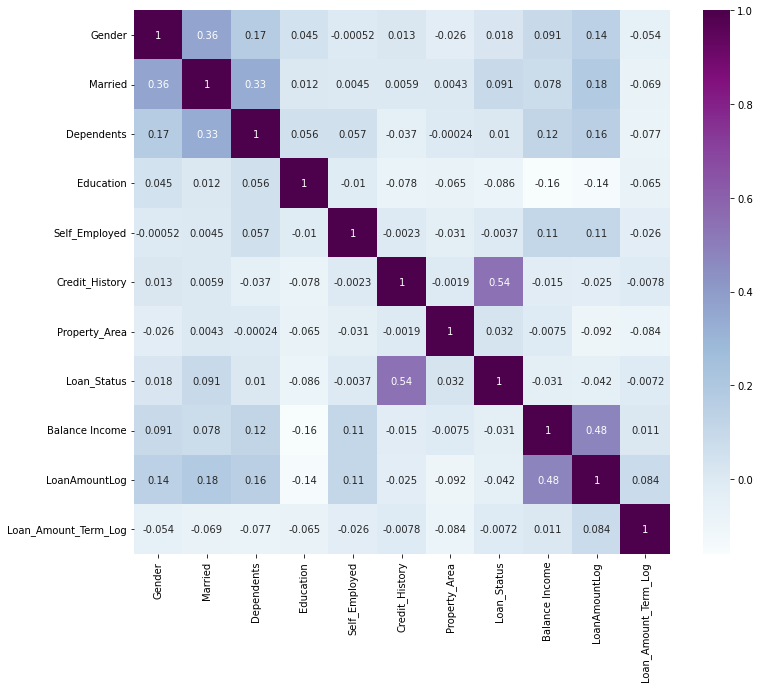

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy score= 0.7886178861788617
Precision score= 0.7596153846153846
Recall score= 0.9875
F1 score= 0.8586956521739131
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix


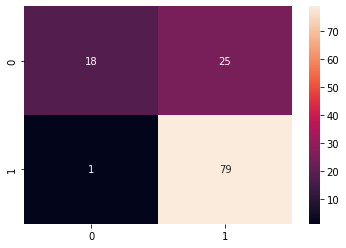

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
logr= LogisticRegression()
logr.fit(x_train,y_train)
yhat=logr.predict(x_test)
print("Accuracy score=",accuracy_score(y_test,yhat))
print("Precision score=",precision_score(y_test,yhat))
print("Recall score=",recall_score(y_test,yhat))
print("F1 score=",f1_score(y_test,yhat))
print(classification_report(y_test,yhat))
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,yhat),annot=True)
plt.show()